In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [92]:
%pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head(5)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [29]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [30]:
df['class'] = (df['class'] == 'g').astype(int)

In [31]:

df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

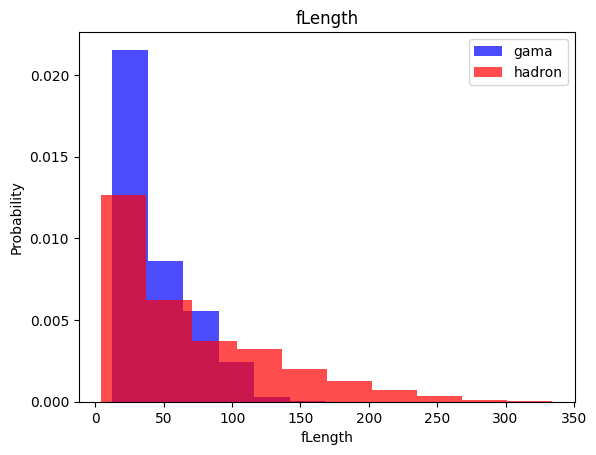

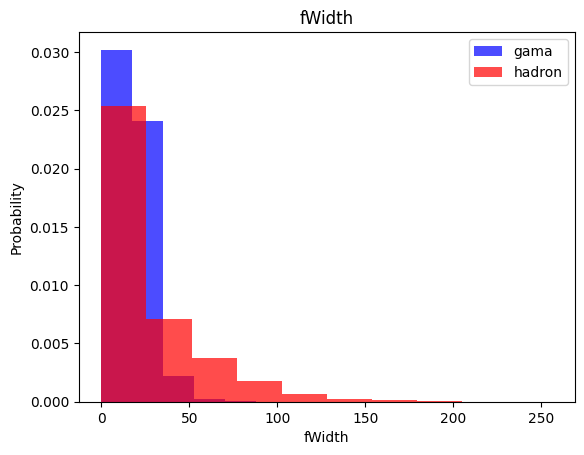

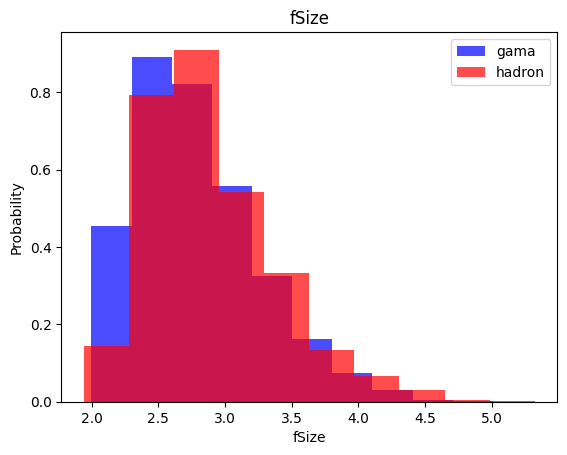

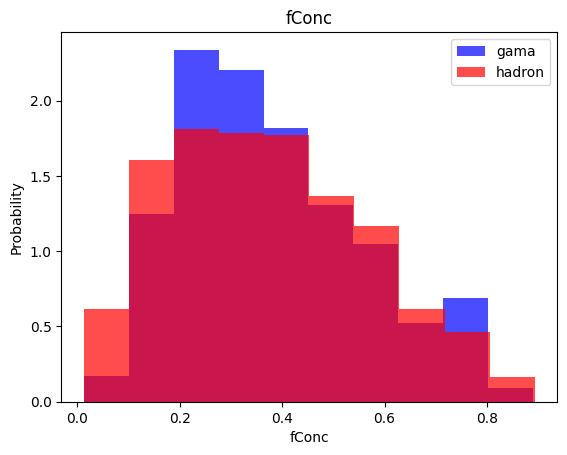

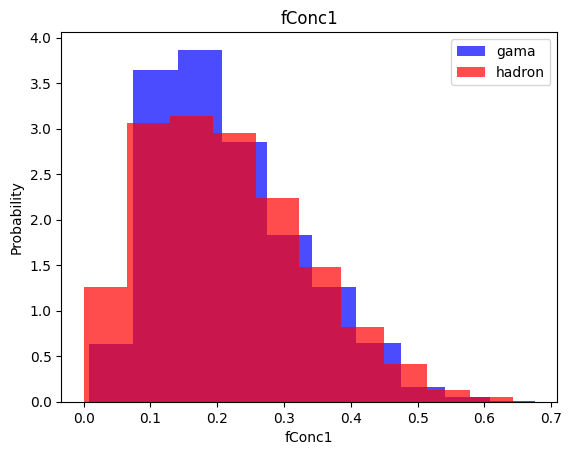

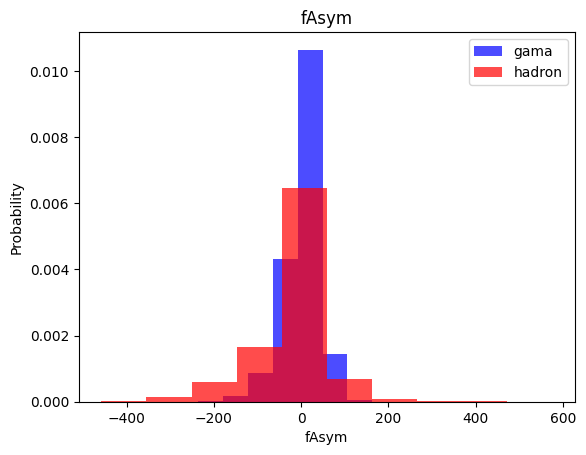

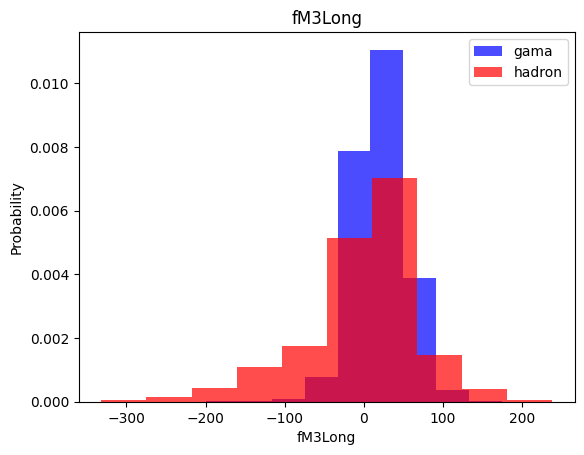

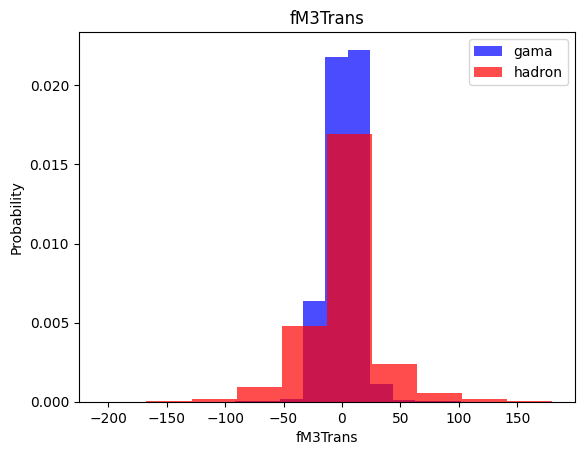

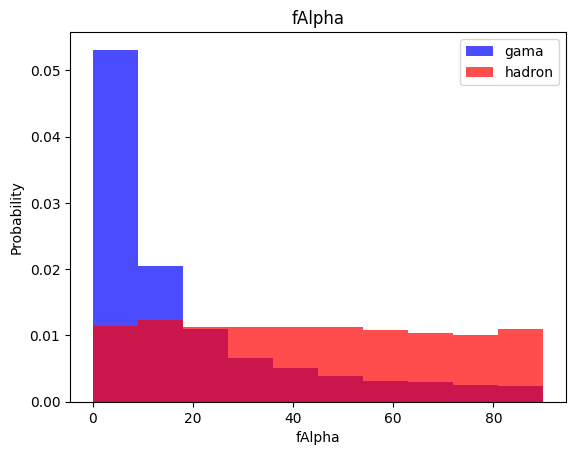

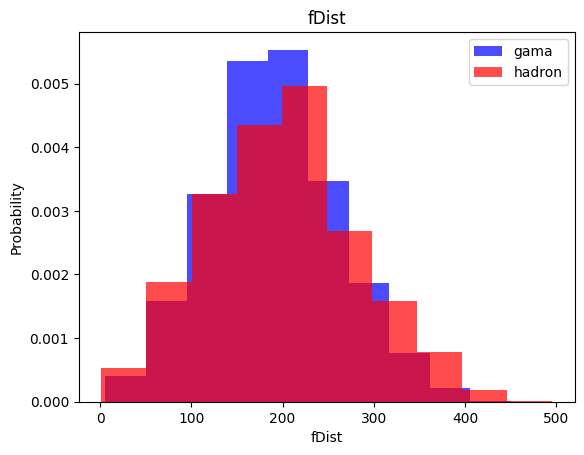

In [32]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='gama', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, Validation and test datasets

In [33]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [34]:
def scale_dataset(dataframe, oversample=False):
    
    feature_column = dataframe.columns[:-1]
    label_column = dataframe.columns[-1]
    
    X = dataframe[feature_column].values
    y = dataframe[label_column].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
   
    return data, X ,y

In [35]:
print(len(train[train["class"] == 1])) #Gamma
print(len(train[train["class"] == 0])) #Hadron

7348
4064


In [36]:
train, X_train, y_train  = scale_dataset(train, oversample=True)
valid, X_valid, y_valid  = scale_dataset(valid, oversample=False)
test, X_test, y_test  = scale_dataset(test, oversample=False)

In [37]:
len(y_train)

14696

In [38]:
sum(y_train == 1)

np.int64(7348)

In [39]:
sum(y_train == 0)

np.int64(7348)

KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn_model.predict(X_test)

In [43]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1310
           1       0.86      0.87      0.87      2494

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [48]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53      1310
           1       0.75      0.91      0.82      2494

    accuracy                           0.74      3804
   macro avg       0.74      0.67      0.68      3804
weighted avg       0.74      0.74      0.72      3804



Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [51]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1310
           1       0.86      0.82      0.84      2494

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



In [52]:
from sklearn.svm import SVC

In [53]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [54]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1310
           1       0.89      0.89      0.89      2494

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Net

In [55]:
import tensorflow as tf

In [121]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
import tensorflow as tf

In [71]:

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (11, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

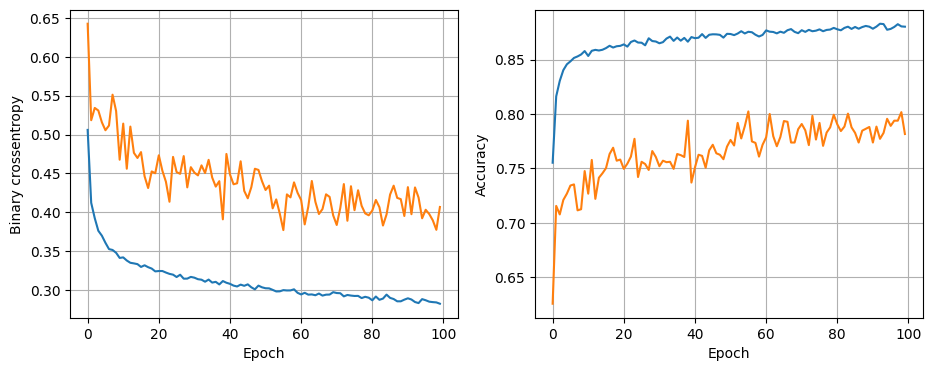

In [72]:
plot_history(history)

In [60]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    history = nn_model.fit(
        X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
    )
    
    return nn_model, history

16 nodes, dropout: 0, lr: 0.01, batch size: 32


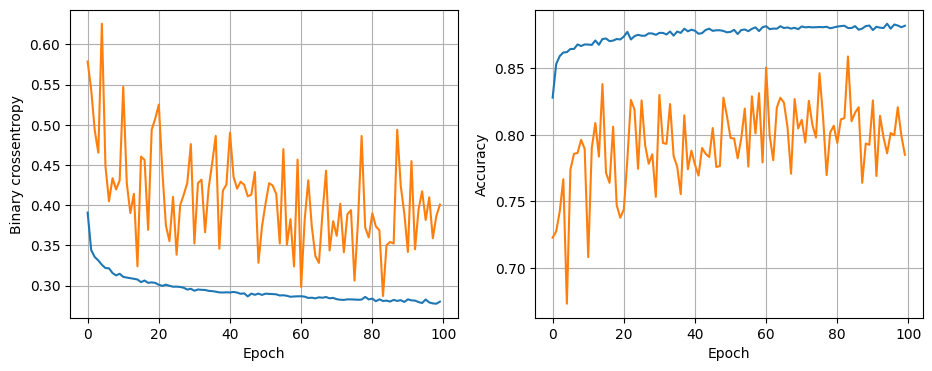

Validation Loss: 0.3183, Accuracy: 0.8659
🔁 New best model found and saved!
16 nodes, dropout: 0, lr: 0.01, batch size: 64


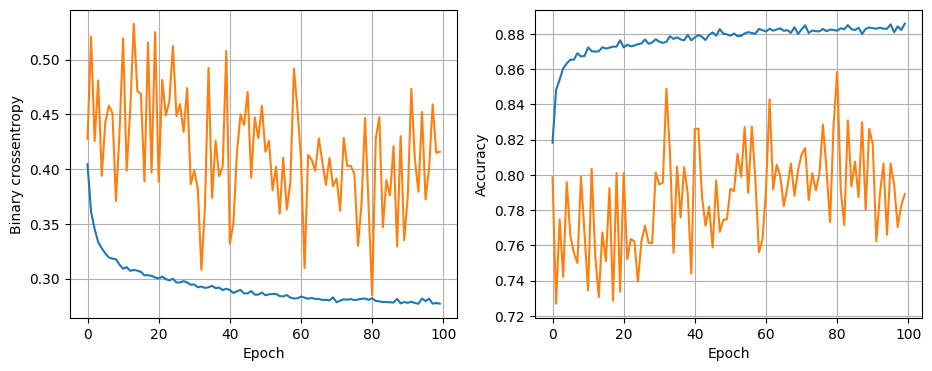

Validation Loss: 0.3350, Accuracy: 0.8672
16 nodes, dropout: 0, lr: 0.01, batch size: 128


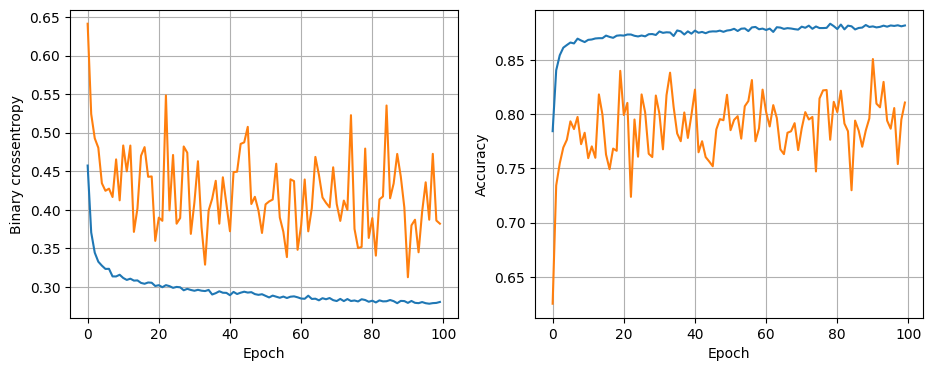

Validation Loss: 0.3233, Accuracy: 0.8612
16 nodes, dropout: 0, lr: 0.005, batch size: 32


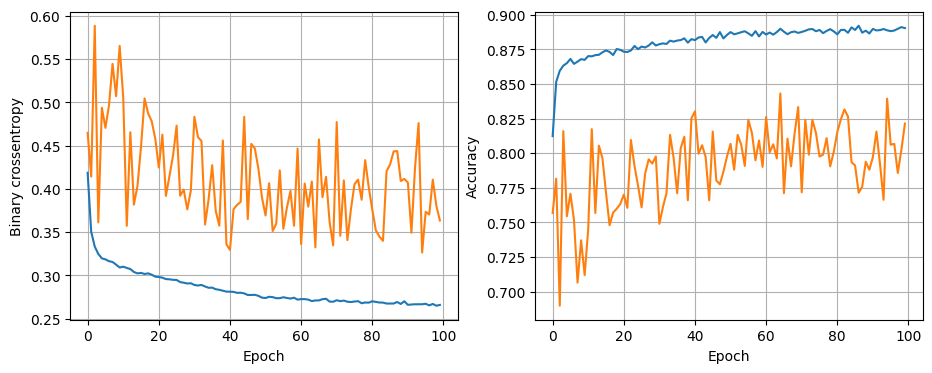

Validation Loss: 0.3200, Accuracy: 0.8722
16 nodes, dropout: 0, lr: 0.005, batch size: 64


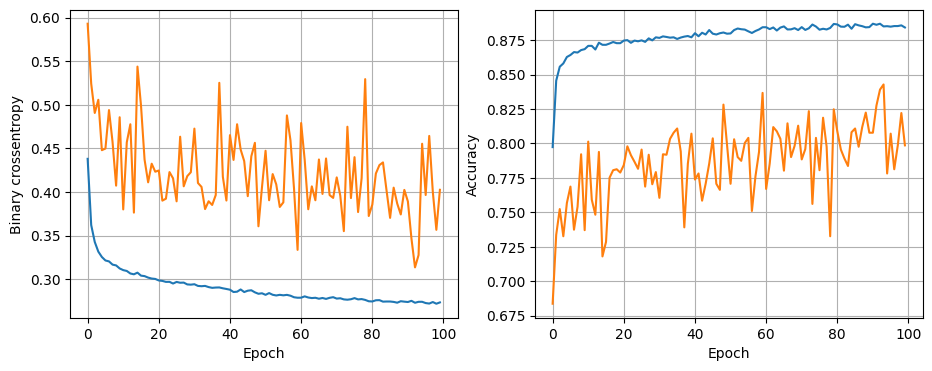

Validation Loss: 0.3172, Accuracy: 0.8649
🔁 New best model found and saved!
16 nodes, dropout: 0, lr: 0.005, batch size: 128


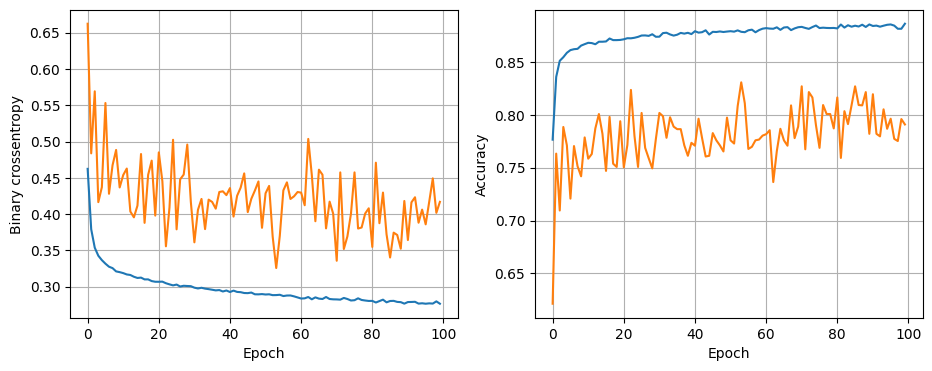

Validation Loss: 0.3216, Accuracy: 0.8662
16 nodes, dropout: 0, lr: 0.001, batch size: 32


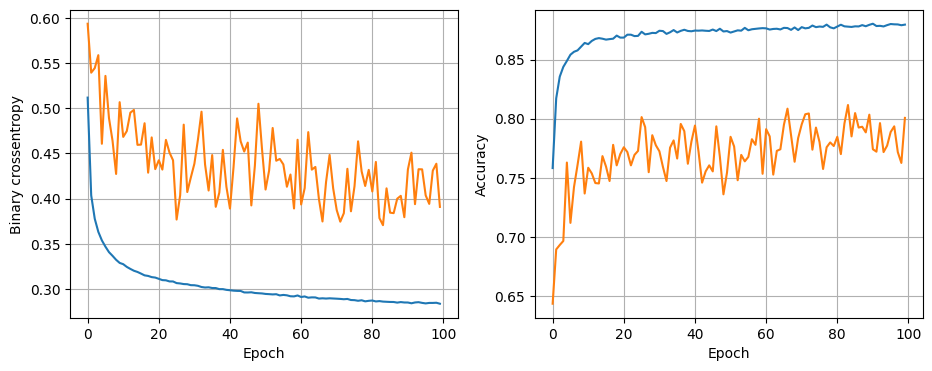

Validation Loss: 0.3248, Accuracy: 0.8680
16 nodes, dropout: 0, lr: 0.001, batch size: 64


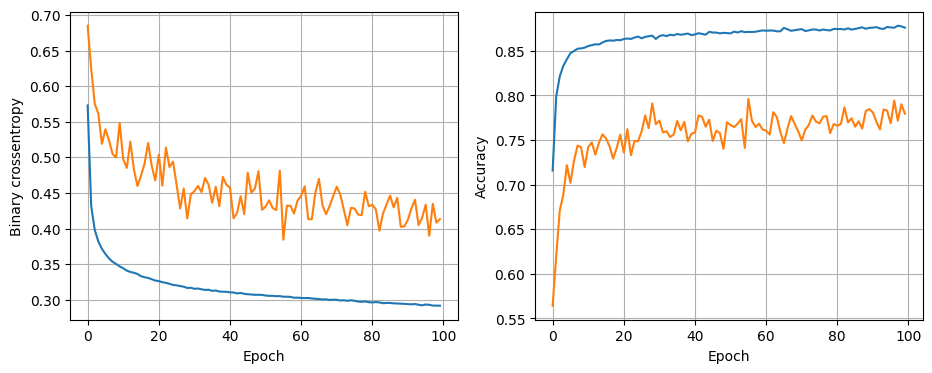

Validation Loss: 0.3169, Accuracy: 0.8651
🔁 New best model found and saved!
16 nodes, dropout: 0, lr: 0.001, batch size: 128


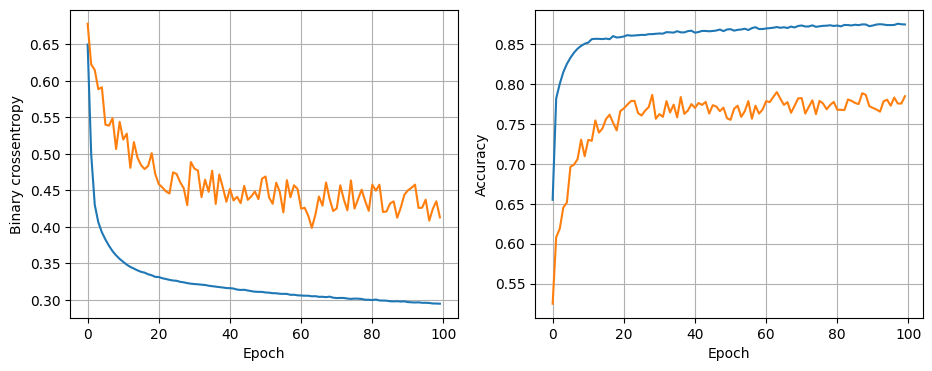

Validation Loss: 0.3260, Accuracy: 0.8672
16 nodes, dropout: 0.2, lr: 0.01, batch size: 32


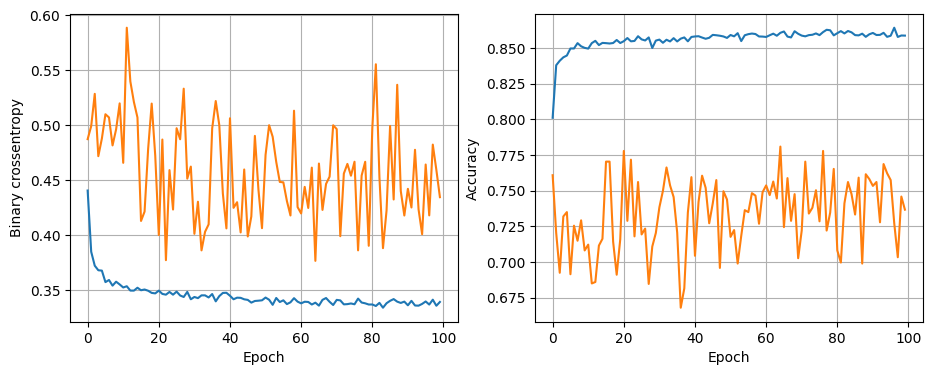

Validation Loss: 0.3314, Accuracy: 0.8657
16 nodes, dropout: 0.2, lr: 0.01, batch size: 64


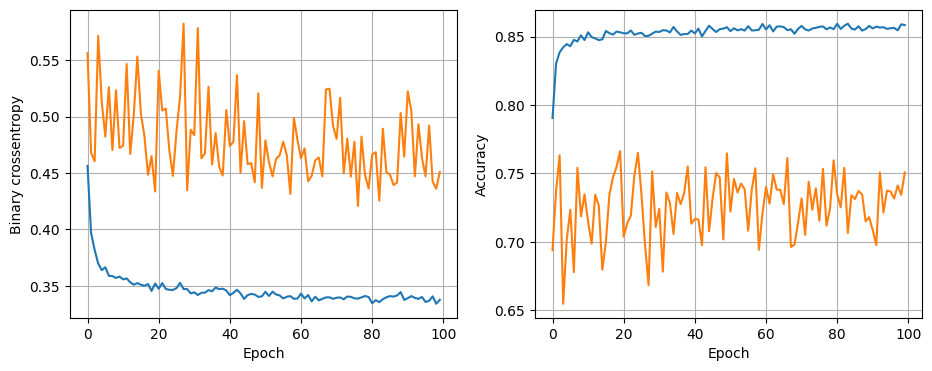

Validation Loss: 0.3318, Accuracy: 0.8615
16 nodes, dropout: 0.2, lr: 0.01, batch size: 128


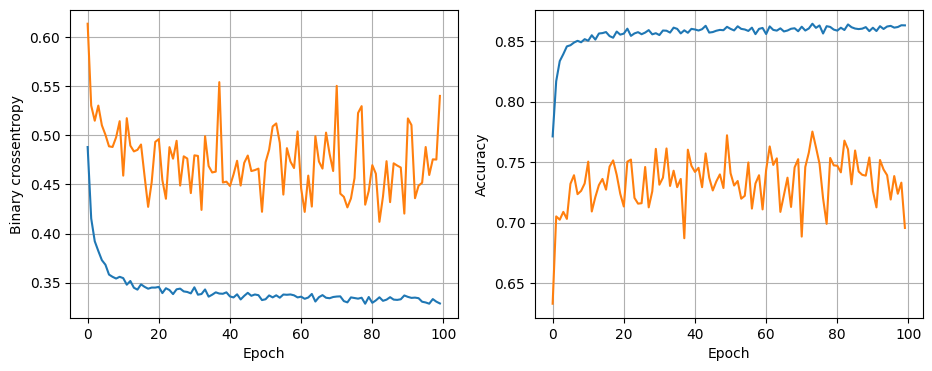

Validation Loss: 0.3257, Accuracy: 0.8620
16 nodes, dropout: 0.2, lr: 0.005, batch size: 32


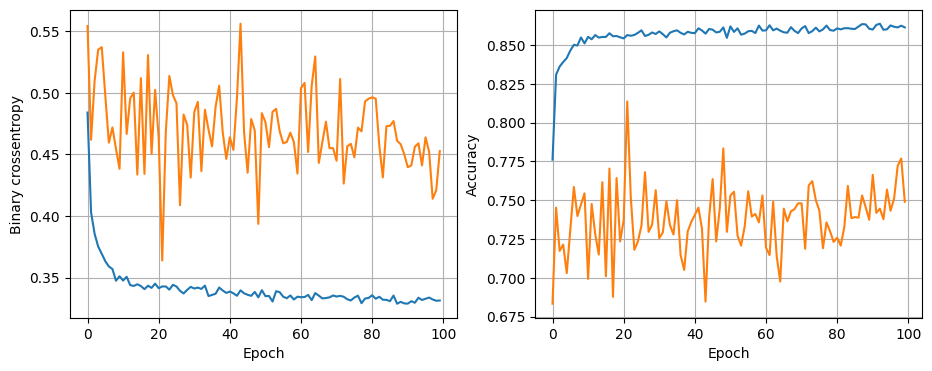

Validation Loss: 0.3242, Accuracy: 0.8636
16 nodes, dropout: 0.2, lr: 0.005, batch size: 64


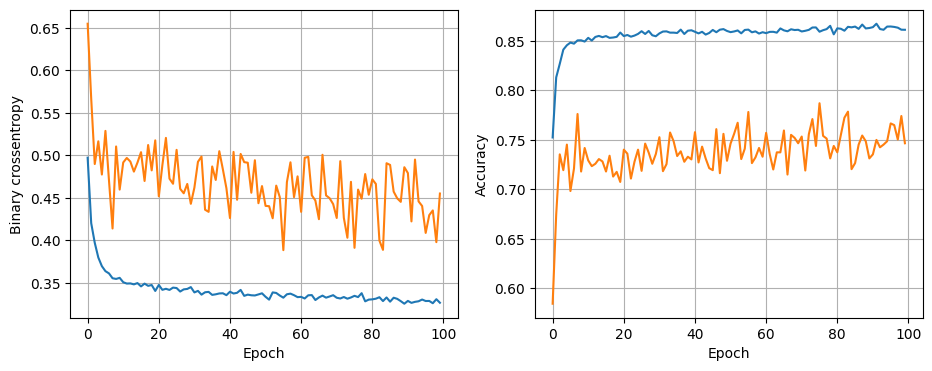

Validation Loss: 0.3179, Accuracy: 0.8683
16 nodes, dropout: 0.2, lr: 0.005, batch size: 128


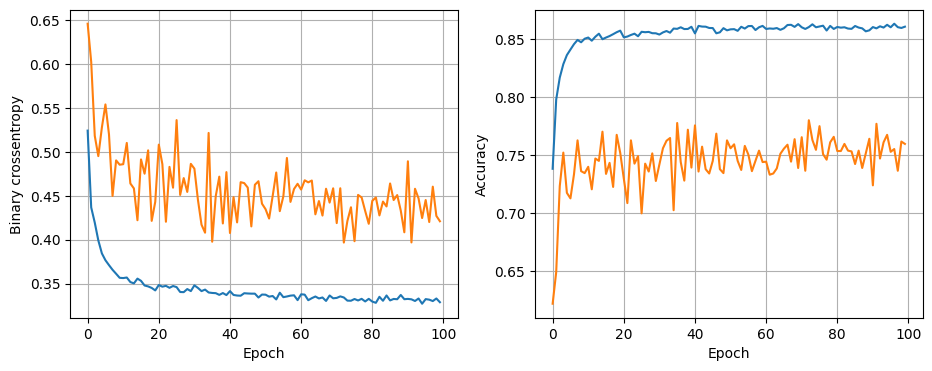

Validation Loss: 0.3235, Accuracy: 0.8654
16 nodes, dropout: 0.2, lr: 0.001, batch size: 32


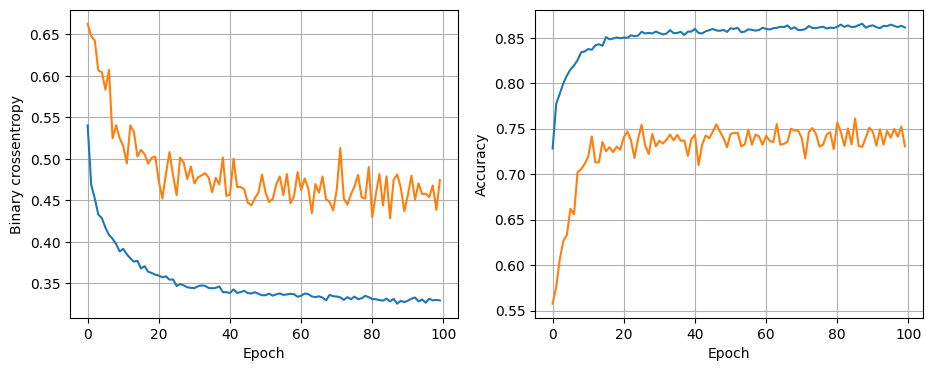

Validation Loss: 0.3211, Accuracy: 0.8620
16 nodes, dropout: 0.2, lr: 0.001, batch size: 64


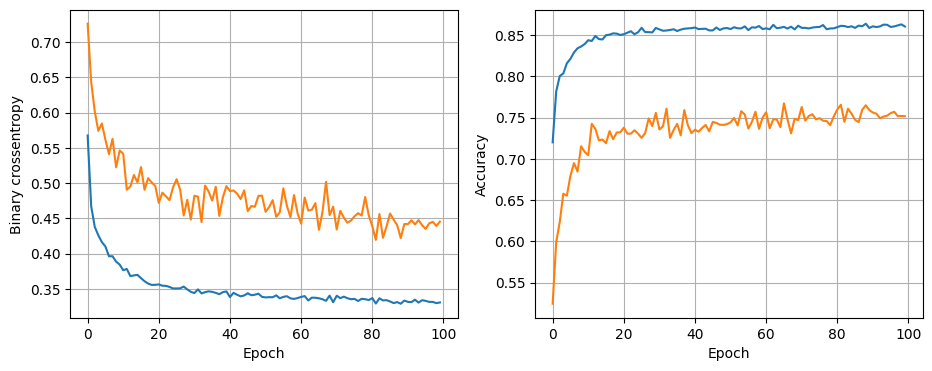

Validation Loss: 0.3269, Accuracy: 0.8651
16 nodes, dropout: 0.2, lr: 0.001, batch size: 128


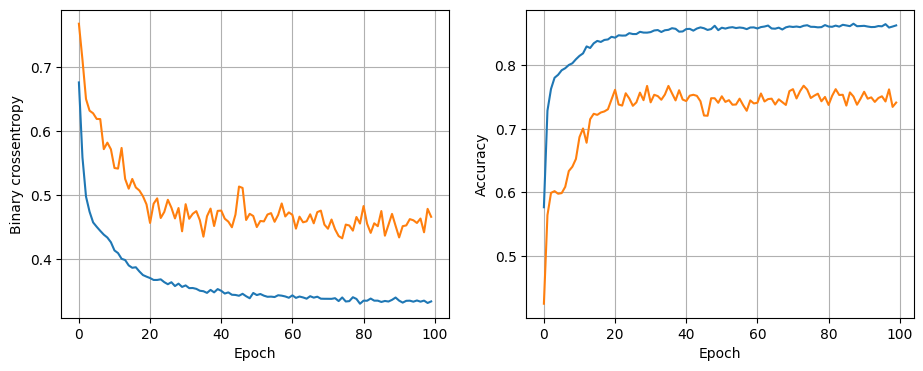

Validation Loss: 0.3195, Accuracy: 0.8683
32 nodes, dropout: 0, lr: 0.01, batch size: 32


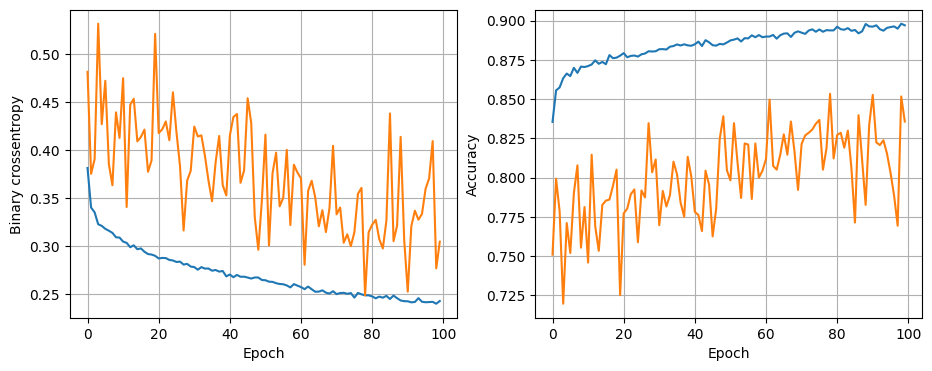

Validation Loss: 0.3872, Accuracy: 0.8520
32 nodes, dropout: 0, lr: 0.01, batch size: 64


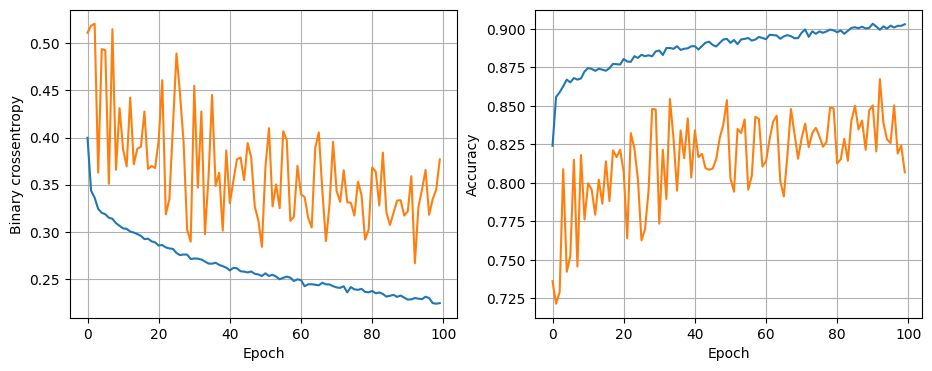

Validation Loss: 0.4271, Accuracy: 0.8620
32 nodes, dropout: 0, lr: 0.01, batch size: 128


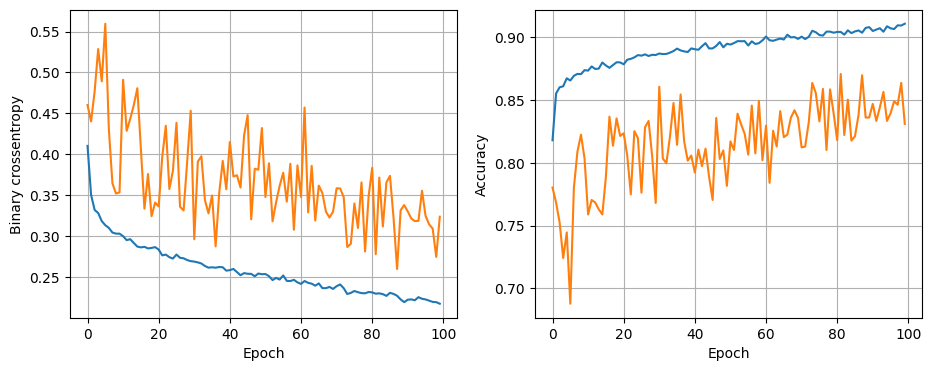

Validation Loss: 0.4148, Accuracy: 0.8507
32 nodes, dropout: 0, lr: 0.005, batch size: 32


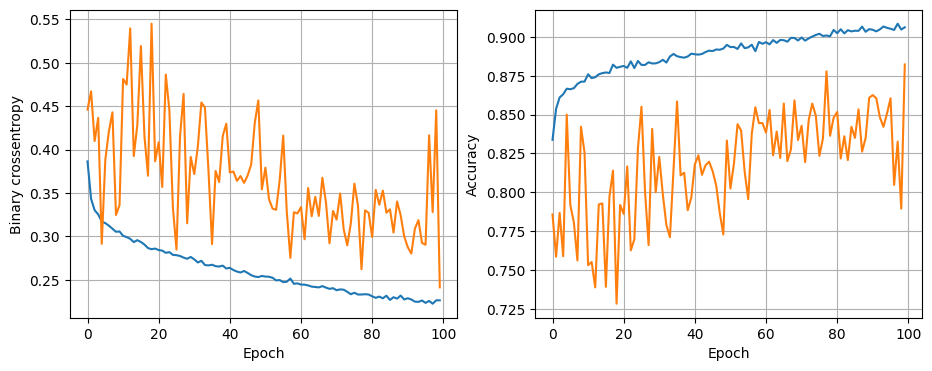

Validation Loss: 0.3901, Accuracy: 0.8557
32 nodes, dropout: 0, lr: 0.005, batch size: 64


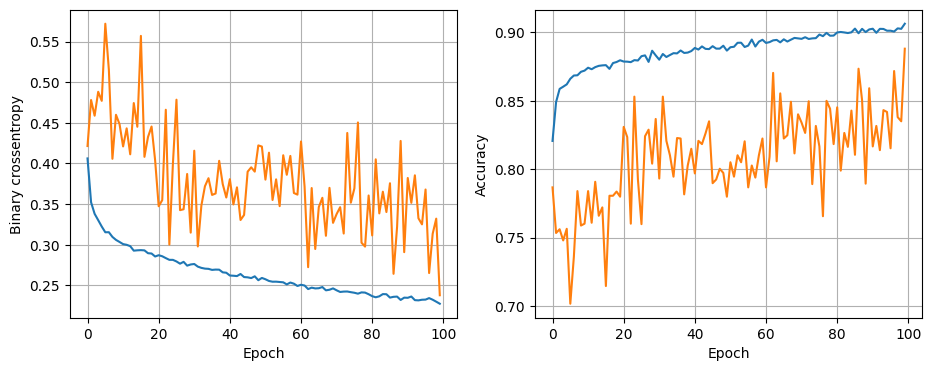

Validation Loss: 0.4158, Accuracy: 0.8446
32 nodes, dropout: 0, lr: 0.005, batch size: 128


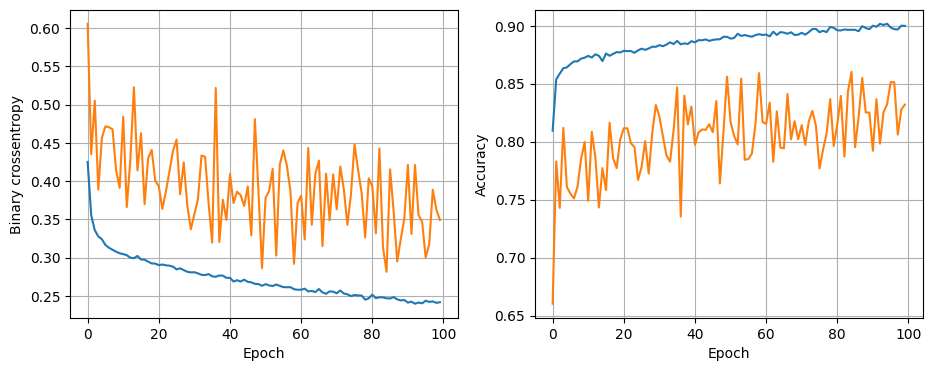

Validation Loss: 0.3604, Accuracy: 0.8559
32 nodes, dropout: 0, lr: 0.001, batch size: 32


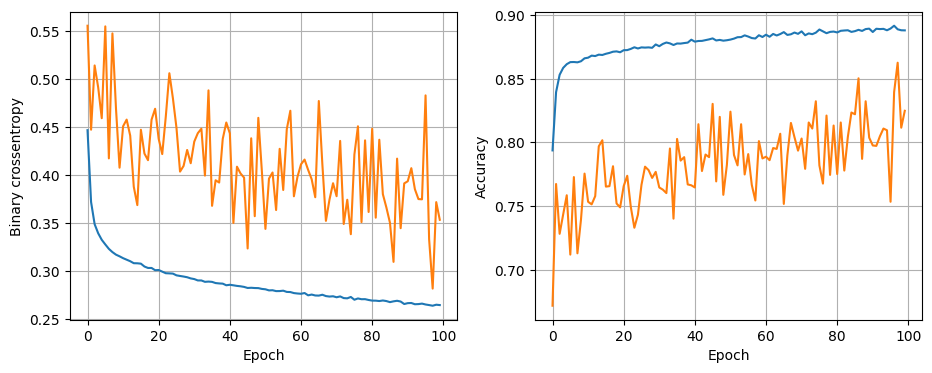

Validation Loss: 0.3323, Accuracy: 0.8623
32 nodes, dropout: 0, lr: 0.001, batch size: 64


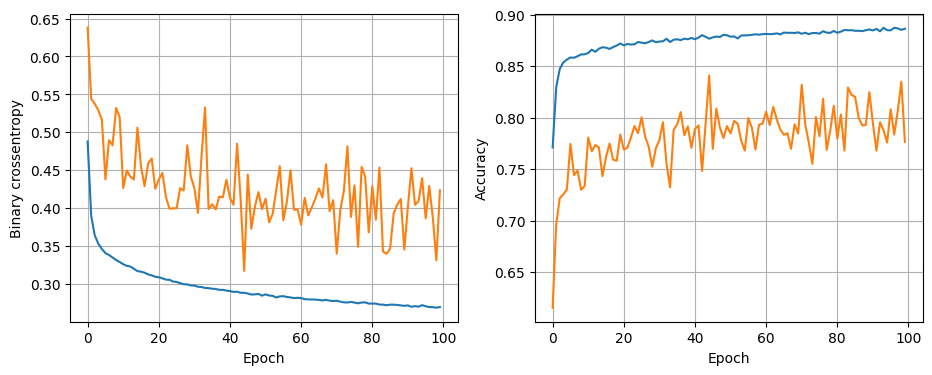

Validation Loss: 0.3141, Accuracy: 0.8720
🔁 New best model found and saved!
32 nodes, dropout: 0, lr: 0.001, batch size: 128


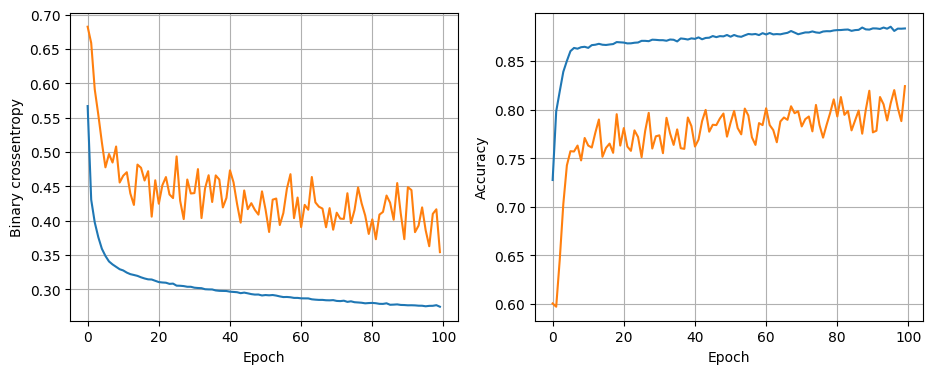

Validation Loss: 0.3259, Accuracy: 0.8667
32 nodes, dropout: 0.2, lr: 0.01, batch size: 32


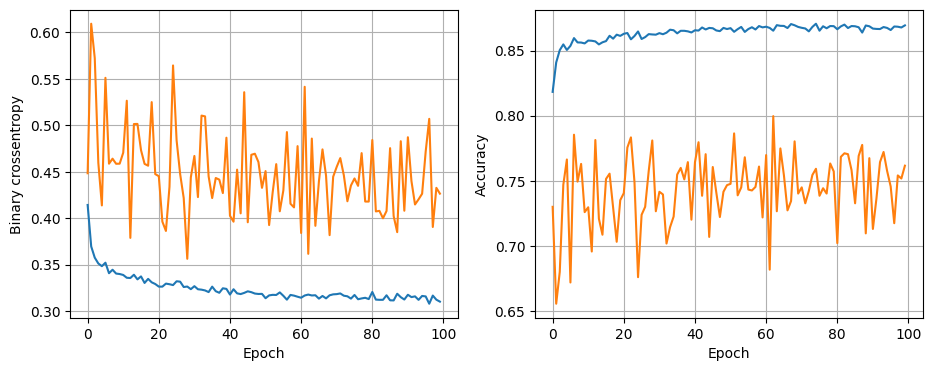

Validation Loss: 0.3238, Accuracy: 0.8657
32 nodes, dropout: 0.2, lr: 0.01, batch size: 64


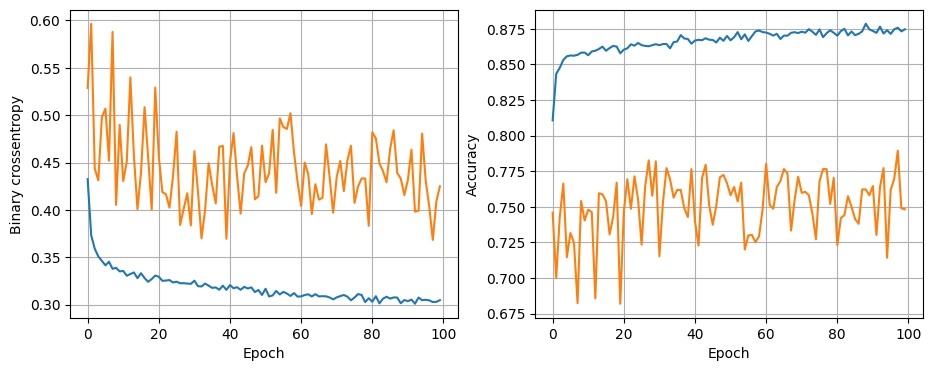

Validation Loss: 0.3066, Accuracy: 0.8683
🔁 New best model found and saved!
32 nodes, dropout: 0.2, lr: 0.01, batch size: 128


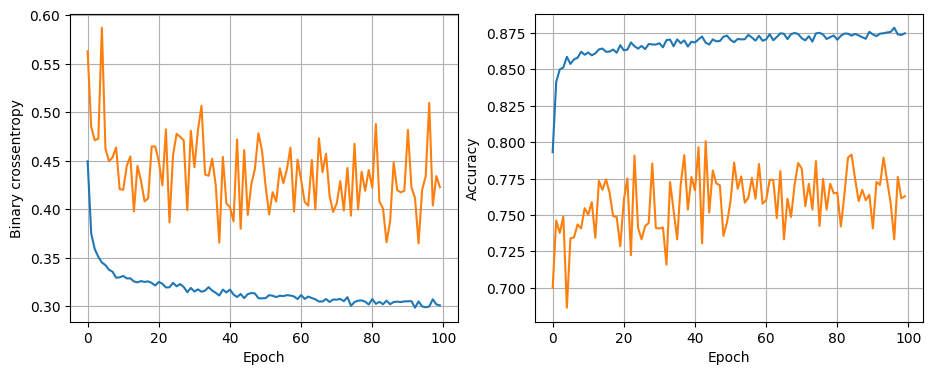

Validation Loss: 0.3070, Accuracy: 0.8704
32 nodes, dropout: 0.2, lr: 0.005, batch size: 32


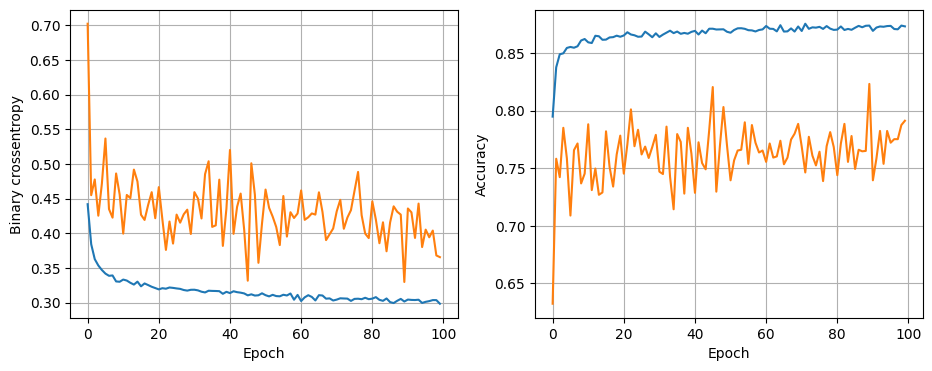

Validation Loss: 0.3185, Accuracy: 0.8641
32 nodes, dropout: 0.2, lr: 0.005, batch size: 64


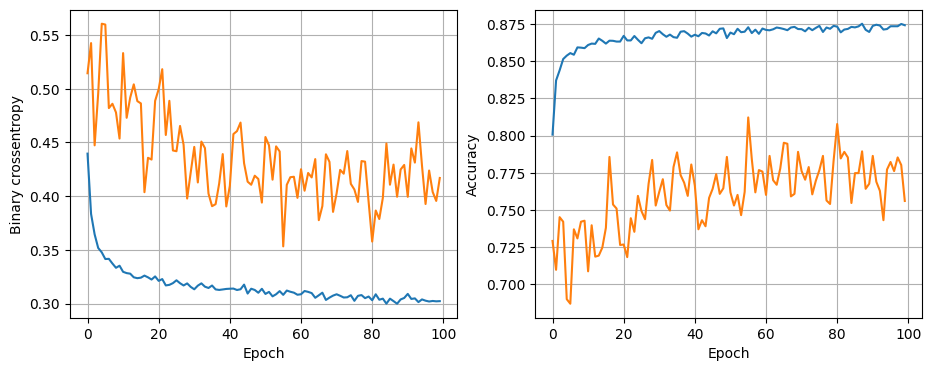

Validation Loss: 0.3095, Accuracy: 0.8672
32 nodes, dropout: 0.2, lr: 0.005, batch size: 128


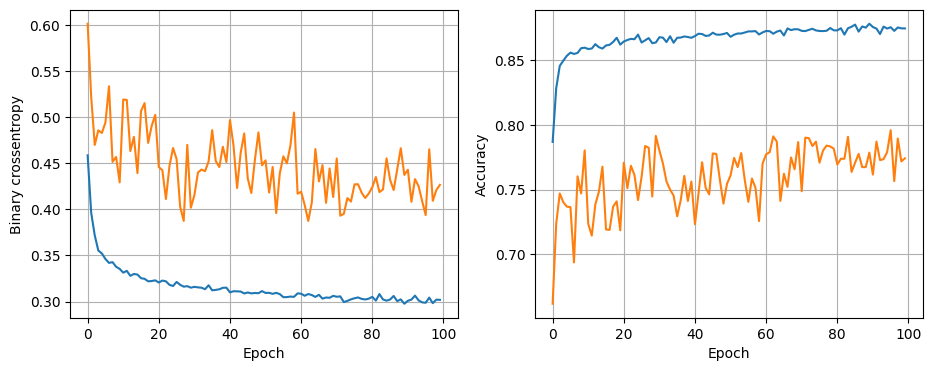

Validation Loss: 0.3139, Accuracy: 0.8654
32 nodes, dropout: 0.2, lr: 0.001, batch size: 32


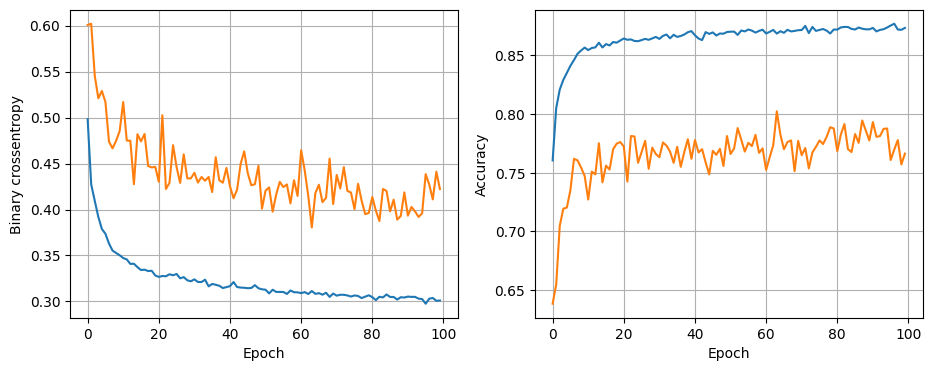

Validation Loss: 0.3115, Accuracy: 0.8675
32 nodes, dropout: 0.2, lr: 0.001, batch size: 64


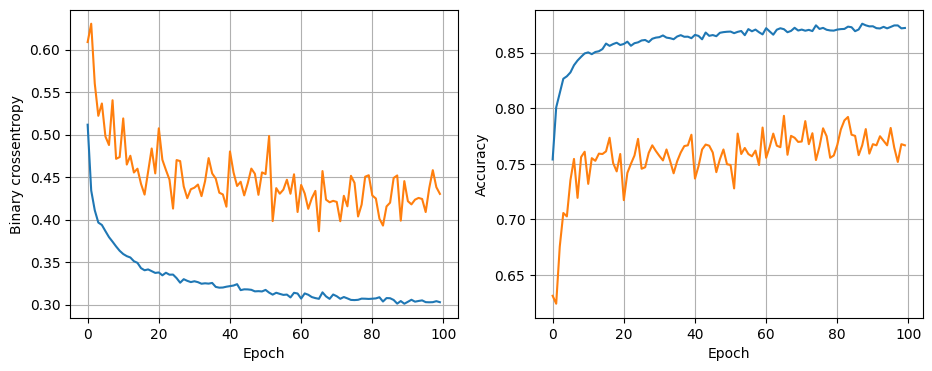

Validation Loss: 0.3086, Accuracy: 0.8701
32 nodes, dropout: 0.2, lr: 0.001, batch size: 128


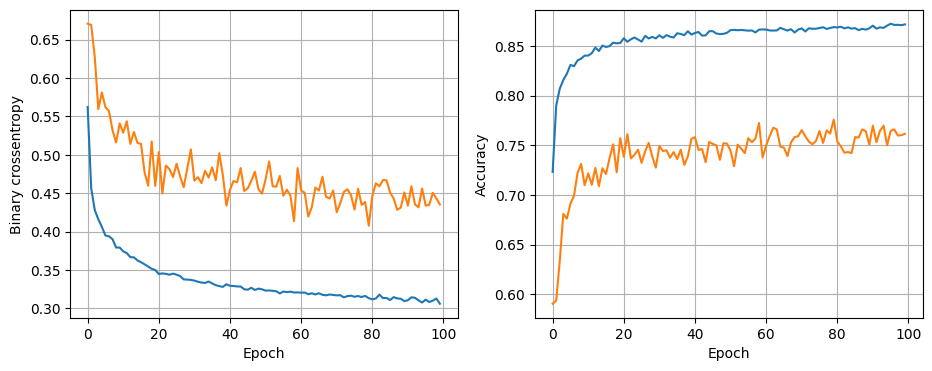

Validation Loss: 0.3111, Accuracy: 0.8688
64 nodes, dropout: 0, lr: 0.01, batch size: 32


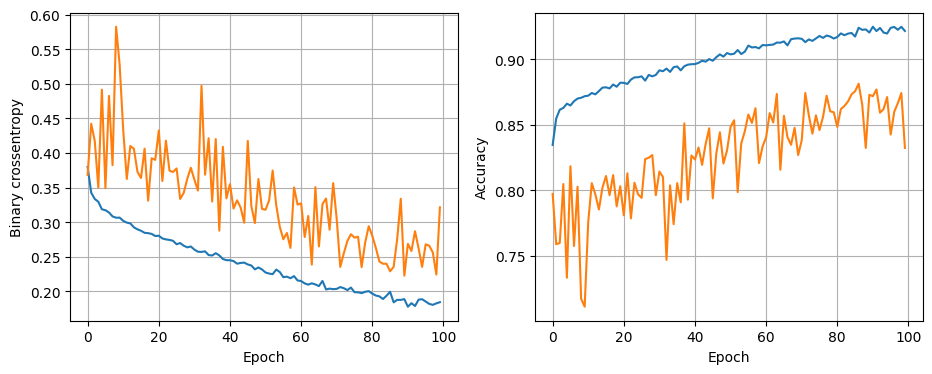

Validation Loss: 0.5879, Accuracy: 0.8478
64 nodes, dropout: 0, lr: 0.01, batch size: 64


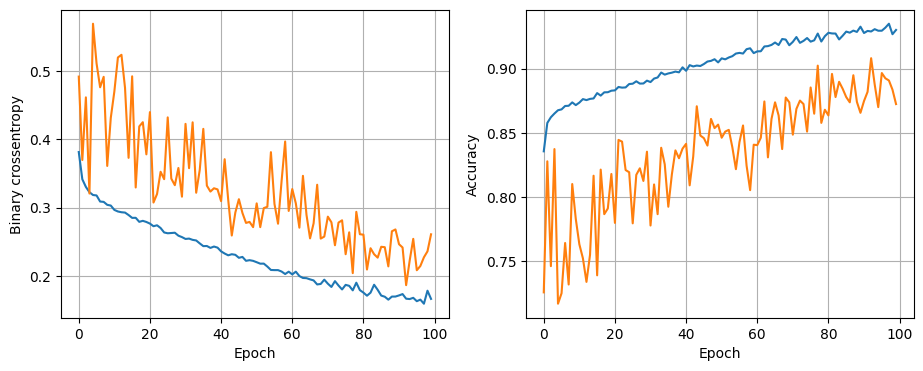

Validation Loss: 0.5739, Accuracy: 0.8549
64 nodes, dropout: 0, lr: 0.01, batch size: 128


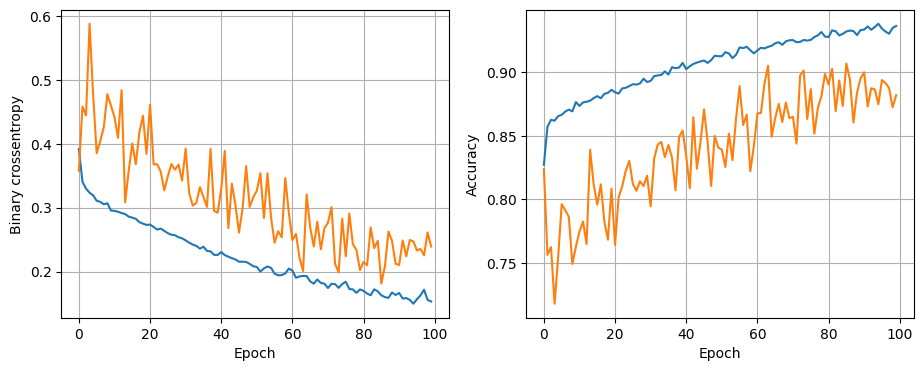

Validation Loss: 0.5615, Accuracy: 0.8588
64 nodes, dropout: 0, lr: 0.005, batch size: 32


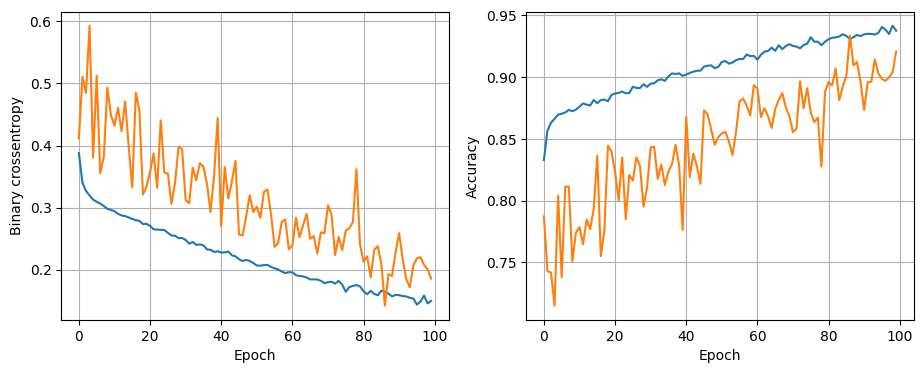

Validation Loss: 0.6851, Accuracy: 0.8368
64 nodes, dropout: 0, lr: 0.005, batch size: 64


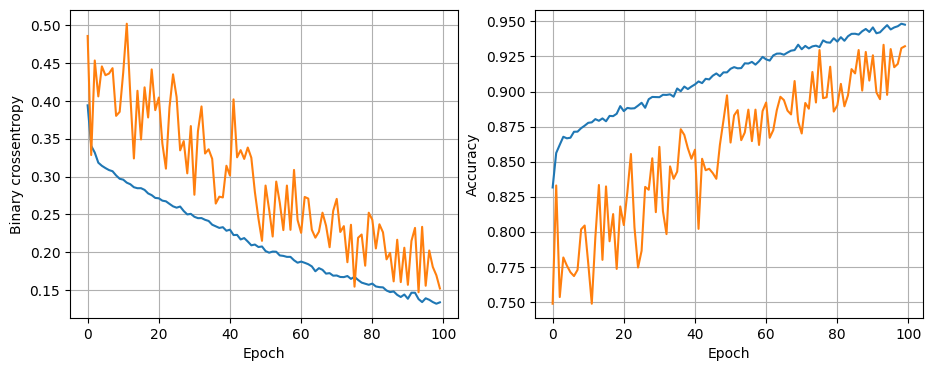

Validation Loss: 0.5887, Accuracy: 0.8423
64 nodes, dropout: 0, lr: 0.005, batch size: 128


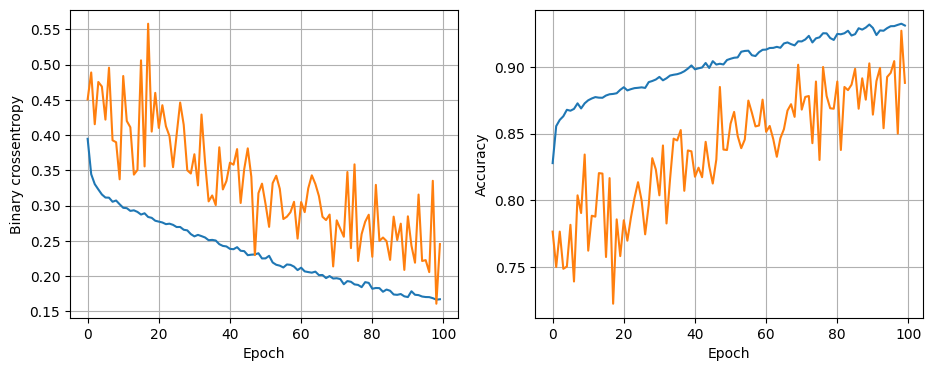

Validation Loss: 0.4866, Accuracy: 0.8502
64 nodes, dropout: 0, lr: 0.001, batch size: 32


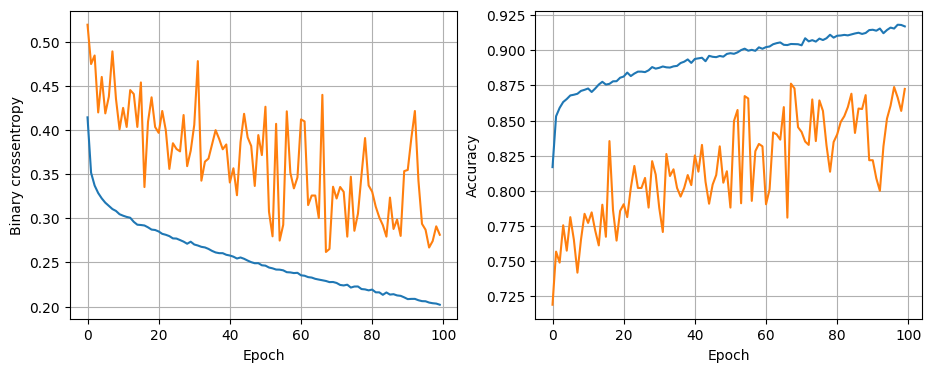

Validation Loss: 0.3606, Accuracy: 0.8657
64 nodes, dropout: 0, lr: 0.001, batch size: 64


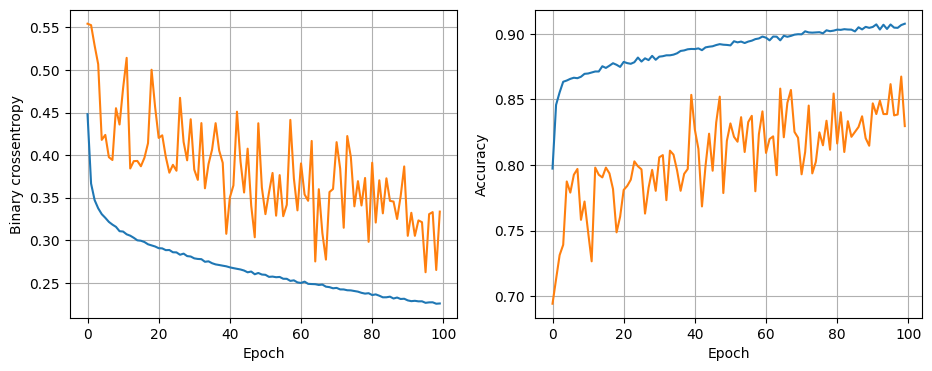

Validation Loss: 0.3513, Accuracy: 0.8591
64 nodes, dropout: 0, lr: 0.001, batch size: 128


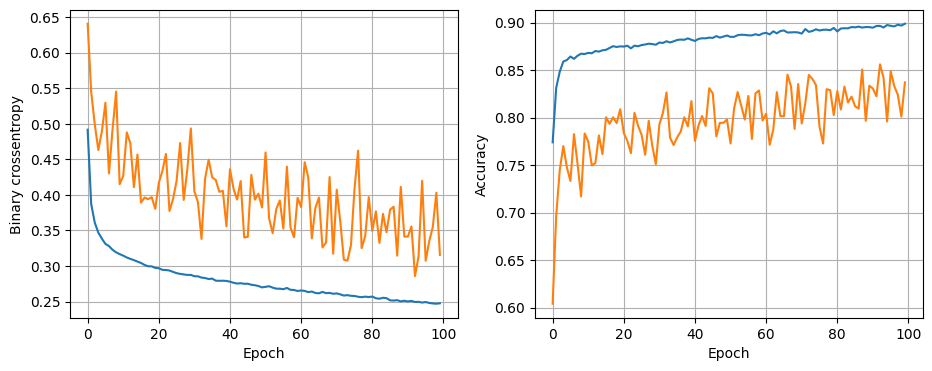

Validation Loss: 0.3311, Accuracy: 0.8588
64 nodes, dropout: 0.2, lr: 0.01, batch size: 32


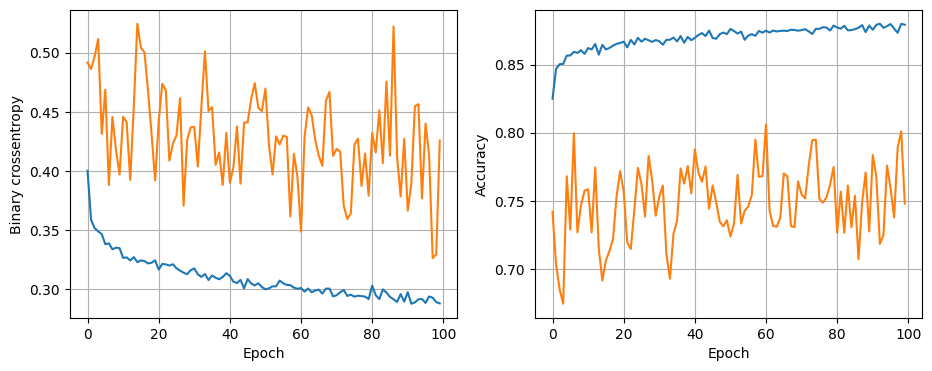

Validation Loss: 0.3199, Accuracy: 0.8670
64 nodes, dropout: 0.2, lr: 0.01, batch size: 64


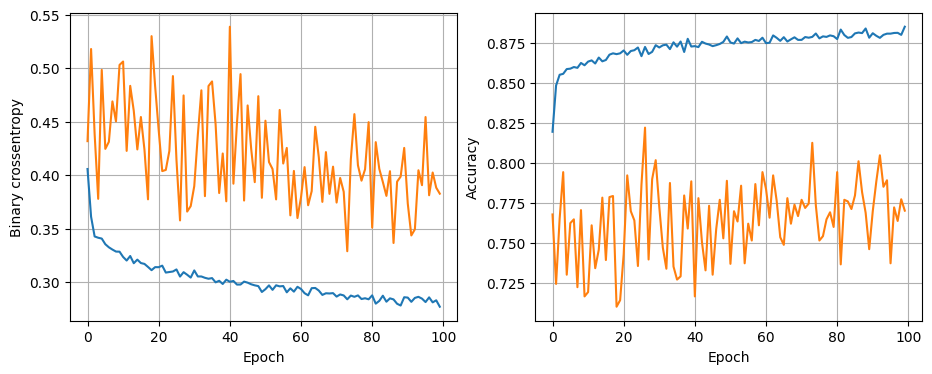

Validation Loss: 0.3236, Accuracy: 0.8659
64 nodes, dropout: 0.2, lr: 0.01, batch size: 128


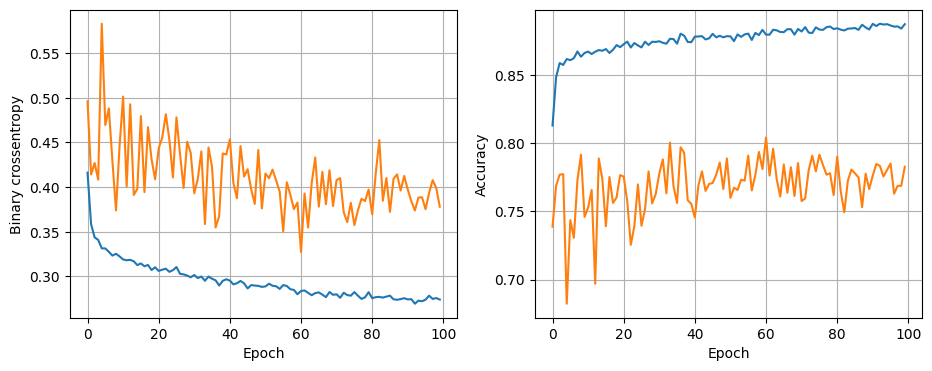

Validation Loss: 0.3108, Accuracy: 0.8696
64 nodes, dropout: 0.2, lr: 0.005, batch size: 32


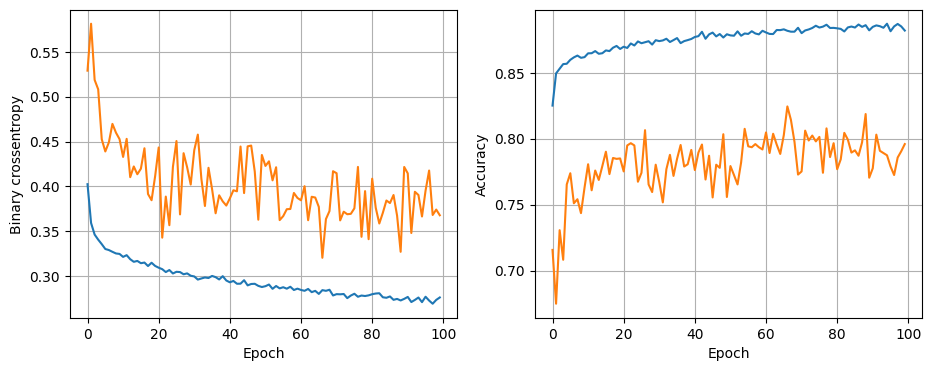

Validation Loss: 0.3148, Accuracy: 0.8644
64 nodes, dropout: 0.2, lr: 0.005, batch size: 64


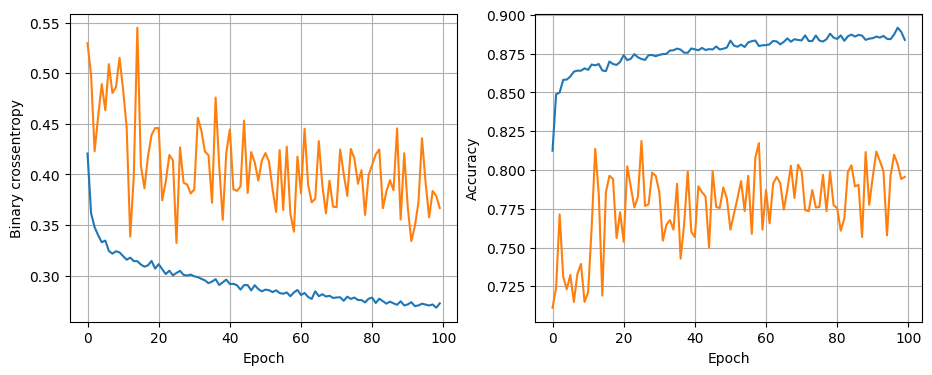

Validation Loss: 0.3142, Accuracy: 0.8670
64 nodes, dropout: 0.2, lr: 0.005, batch size: 128


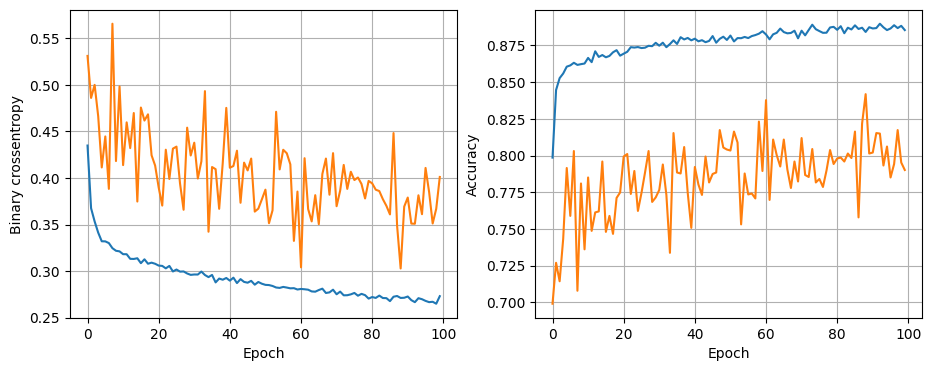

Validation Loss: 0.3168, Accuracy: 0.8675
64 nodes, dropout: 0.2, lr: 0.001, batch size: 32


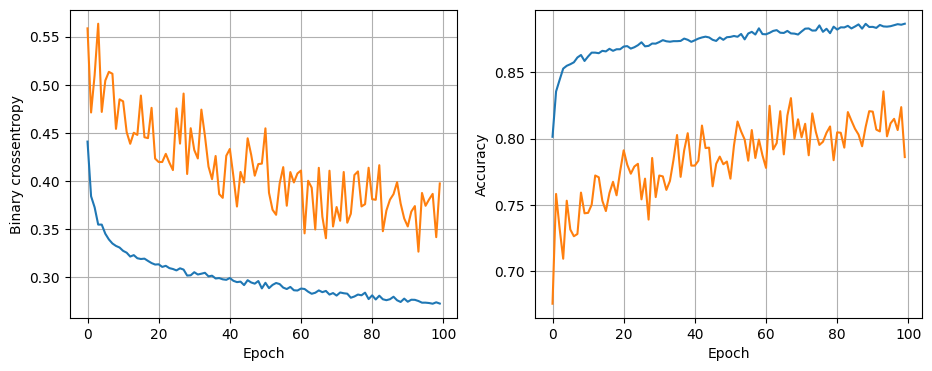

Validation Loss: 0.3091, Accuracy: 0.8725
64 nodes, dropout: 0.2, lr: 0.001, batch size: 64


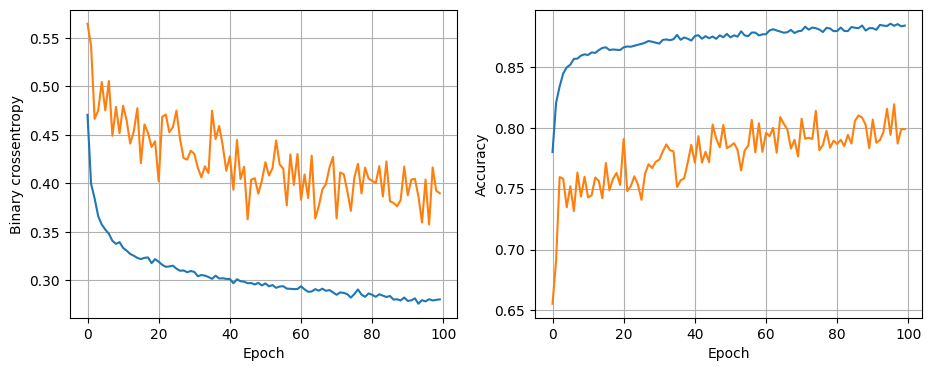

Validation Loss: 0.3098, Accuracy: 0.8662
64 nodes, dropout: 0.2, lr: 0.001, batch size: 128


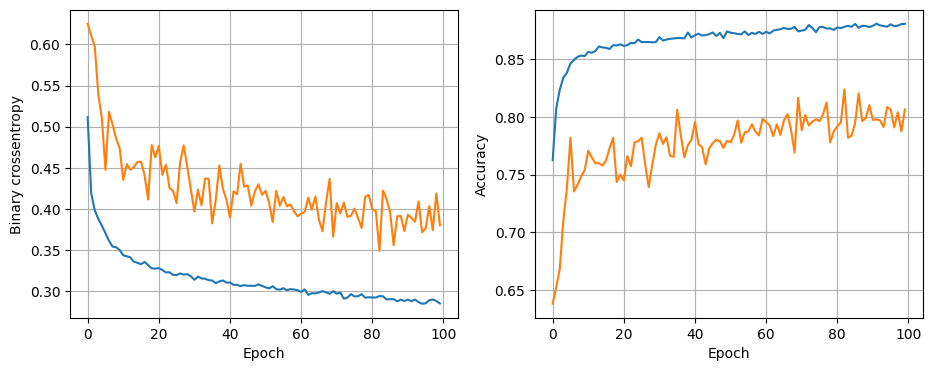

Validation Loss: 0.3092, Accuracy: 0.8712


In [74]:
least_val_loss = float('inf')
least_val_model = None

epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout: {dropout_prob}, lr: {lr}, batch size: {batch_size}")
                
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                
                val_loss, val_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
                print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")
                
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_val_model = model
                    print("🔁 New best model found and saved!")


In [80]:
y_pred = least_val_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1310
           1       0.87      0.95      0.91      2494

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804



In [ ]:
# history = nn_model.fit(
#     X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0
# )

Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 29s 54ms/step - accuracy: 0.7509 - loss: 0.5203 - val_accuracy: 0.7223 - val_loss: 0.4851
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8323 - loss: 0.3803 - val_accuracy: 0.7348 - val_loss: 0.5052
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8492 - loss: 0.3599 - val_accuracy: 0.7227 - val_loss: 0.5402
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8525 - loss: 0.3492 - val_accuracy: 0.7652 - val_loss: 0.4640
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8623 - loss: 0.3284 - val_accuracy: 0.7662 - val_loss: 0.4494
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8564 - loss: 0.3362 - val_accuracy: 0.7335 - val_loss: 0.5369
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8628 - loss: 0.3269 - val_accuracy: 0.7358 - val_loss: 0.5322
Epoch 8/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8626 - loss: 0.3195 

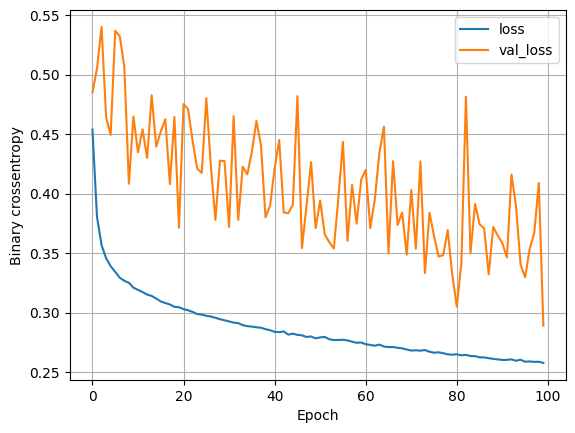

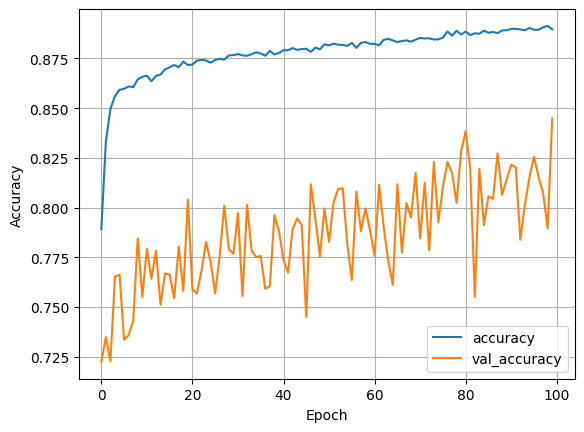

In [ ]:
# plot_loss(history)
# plot_accuracy(history)